# Two Port Nodes

## T-Network of Resistors, Combined using ABCD Cascading Networks

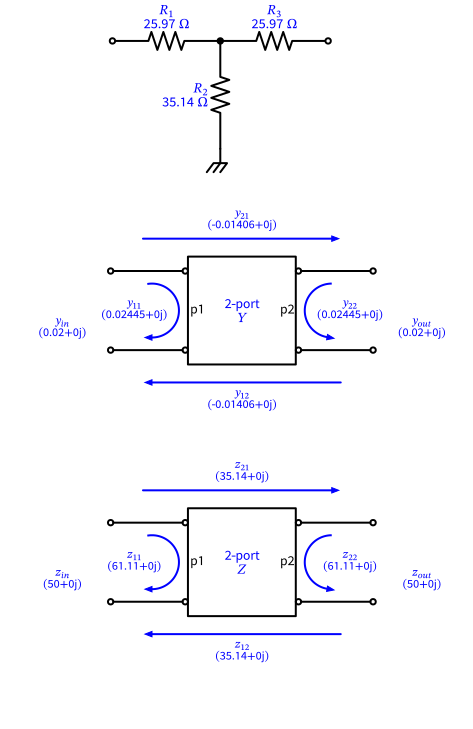

In [1]:
import sys

import numpy as np
import pint
import schemdraw as schem
import schemdraw.elements as e

sys.path.append("../lib")
from schematics import Node2P
from ycx_complex_numbers import Neta, Netb, NetY, NetZ, Y, Z

schem.use("svg")

ureg = pint.UnitRegistry()
ureg = pint.UnitRegistry(autoconvert_offset_to_baseunit=True)

# 10db pad for 50 Ohm
R1 = 25.97
R2 = 35.14
R3 = 25.97

ZS = 50 + 0j
ZL = 50 + 0j

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=R1, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=1 / R2, a22=1))
a.append(Neta(a11=1, a12=R3, a21=0, a22=1))
aa = np.prod(a)
yaa = aa.to_Y()
zaa = aa.to_Z()

d = schem.Drawing()
d += e.Gap().right()
d.push()
d += e.Dot(open=True)
d += e.Resistor().label(f"$R_1$\n{(R1*ureg.ohms):~#P}", color="blue").right()
d += e.Dot()
d.push()
d += e.Resistor().label(f"$R_2$\n{(R2*ureg.ohms):~#P}", color="blue").down()
d += e.GroundChassis()
d.pop()
d += e.Resistor().label(f"$R_3$\n{(R3*ureg.ohms):~#P}", color="blue").right()
d += e.Dot(open=True)
d.pop()


def draw_nodes(d=None, y=None, z=None):
    yin = y.yin(YL=1 / ZL)
    yout = y.yout(YS=1 / ZS)

    zin = z.zin(ZL=ZL)
    zout = z.zout(ZS=ZS)

    d.push()
    d += e.Gap().down().length(9)
    d += (
        N1 := Node2P(
            name="2-port\n$Y$",
            x11="$y_{11}$\n" + f"{y.y11.c:.4}",
            x12="$y_{12}$\n" + f"{y.y12.c:.4}",
            x21="$y_{21}$\n" + f"{y.y21.c:.4}",
            x22="$y_{22}$\n" + f"{y.y22.c:.4}",
            inp="$y_{in}$\n" + f"{yin.c:.4}",
            outp="$y_{out}$\n" + f"{yout.c:.4}",
        ).right()
    )

    d.pop()
    # d.push()
    d += e.Gap().down().length(16)
    d += (
        N1 := Node2P(
            name="2-port\n$Z$",
            x11="$z_{11}$\n" + f"{z.z11.c:.4}",
            x12="$z_{12}$\n" + f"{z.z12.c:.4}",
            x21="$z_{21}$\n" + f"{z.z21.c:.4}",
            x22="$z_{22}$\n" + f"{z.z22.c:.4}",
            inp="$z_{in}$\n" + f"{zin.c:.4}",
            outp="$z_{out}$\n" + f"{zout.c:.4}",
        ).right()
    )

    d += e.Gap().down()


draw_nodes(d=d, y=yaa, z=zaa)
d.draw()

## $\pi$-Network of Resistors, Combined using ABCD Cascading Networks

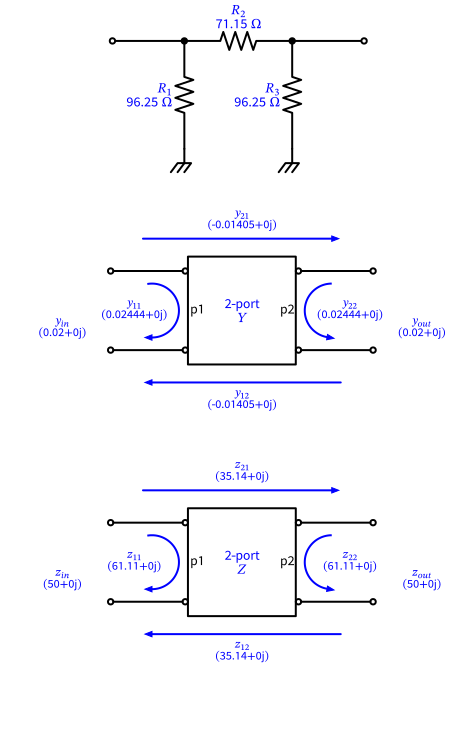

In [2]:
# 10dB pad for 50 Ohm
R1 = 96.25
R2 = 71.15
R3 = 96.25

ZS = 50 + 0j
ZL = 50 + 0j

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=0, a21=1 / R1, a22=1))
a.append(Neta(a11=1, a12=R2, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=1 / R3, a22=1))
aa = np.prod(a)
yaa = aa.to_Y()
zaa = aa.to_Z()

d = schem.Drawing()
d += e.Gap().right()
d.push()

d += e.Dot(open=True)
d += e.Line().length(2)
d += e.Dot()
d.push()
d += e.Resistor().label(f"$R_1$\n{(R1*ureg.ohms):~#P}", color="blue").down()
d += e.GroundChassis()

d.pop()
d += e.Resistor().label(f"$R_2$\n{(R2*ureg.ohms):~#P}", color="blue").right()
d += e.Dot()
d.push()
d += e.Resistor().label(f"$R_3$\n{(R3*ureg.ohms):~#P}", color="blue").down()
d += e.GroundChassis()
d.pop()
d += e.Line().length(2)
d += e.Dot(open=True)


d.pop()
draw_nodes(d=d, y=yaa, z=zaa)
d.draw()

## Chebyshev Pi Low Pass Filter (80MHz cutoff, $Z_0=75\Omega$), using ABCD Cascading Networks

Characteristics shown for 70MHz:-

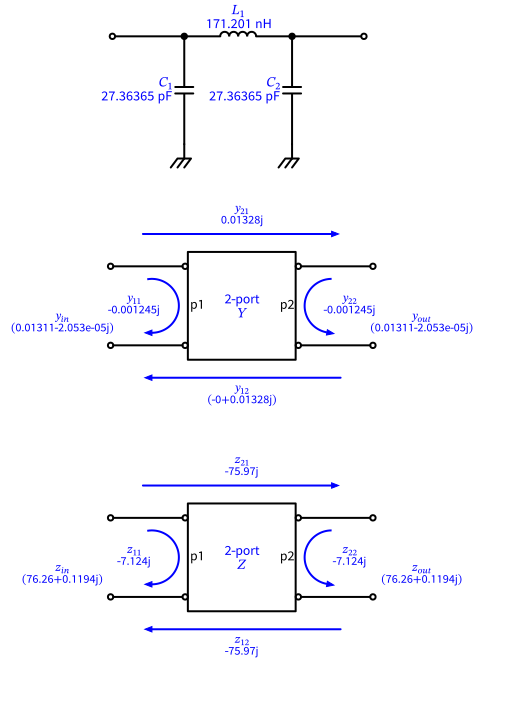

In [4]:
# Chebyshev Pi low pass, cutoff 80MHz
F = 70 * 10**6
C1 = 27.36365 * 10**-12
L1 = 171.201 * 10**-9
C2 = 27.36365 * 10**-12

ZS = 75 + 0j
ZL = 75 + 0j

jw = 1j * 2 * math.pi * F

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=0, a21=jw * C1, a22=1))
a.append(Neta(a11=1, a12=jw * L1, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=jw * C2, a22=1))
aa = np.prod(a)
yaa = aa.to_Y()
zaa = aa.to_Z()

d = schem.Drawing()
d += e.Gap().right()
d.push()

d += e.Dot(open=True)
d += e.Line().length(2)
d += e.Dot()
d.push()
d += e.Capacitor().label(f"$C_1$\n{(C1*ureg.farad):.5f~#P}", color="blue").down()
d += e.GroundChassis()

d.pop()
d += e.Inductor().label(f"$L_1$\n{(L1*ureg.henry):.3f~#P}", color="blue").right()
d += e.Dot()
d.push()
d += e.Capacitor().label(f"$C_2$\n{(C2*ureg.farad):.5f~#P}", color="blue").down()
d += e.GroundChassis()
d.pop()
d += e.Line().length(2)
d += e.Dot(open=True)


d.pop()
draw_nodes(d=d, y=yaa, z=zaa)
d.draw()